In [1]:
#maindir = '/home/matthew/Desktop/DataOutputs/HFWM DATA/'
#maindir = Matthew - University of Cincinnati
maindir ='C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/'


0.023721299187609124
mu1 = 0.001690955596621561 for wavelength =  840  nm at 1.5095
mu2 = 0.0020038702121639817 for wavelength =  840  nm at 1.5066000000000002
mu3 = 0.0019215278144716352 for wavelength =  840  nm at 1.4895
mu4 = 0.002482550790723118 for wavelength =  840  nm at 1.4835
ol21 = 0.001690955596621561
ol61 = 0.0020038702121639817
oli21 = 0.0019215278144716352
oli61 = 0.002482550790723118


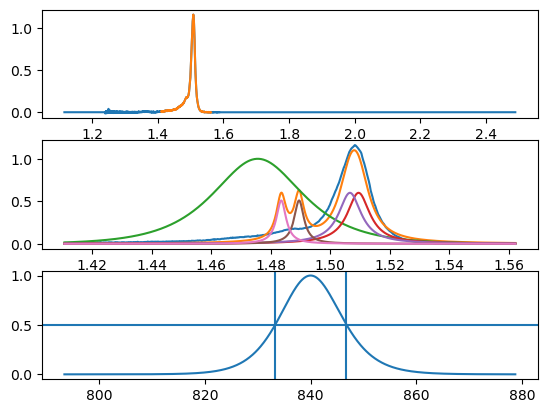

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import voigt_profile as voigt
from scipy import constants as c 
def gauss(x,A,S,x0):
    return A*np.exp(-(x-x0)**2/S**2/2)
def lorentz(x,A,G,x0):
    return A*1/(1+((x-x0)/G)**2)
def PLfunct(E,A,B,C,D,G1,G2,G3,G4,x1,x2,x3,x4):
    return lorentz(E,A,G1,x1)+lorentz(E,B,G2,x2)+lorentz(E,C,G3,x3)+lorentz(E,D,G4,x4)
def energydist(E,E0,Ew,A):
    return A/np.cosh((E-E0)/Ew)
def dE(wl0,wlw):
    return 1239.513/(wl0-wlw)-1239.513/(wl0+wlw)
E0 = 1.5095
Ex1 =  0.0029#exciton splitting energy
Ex2 =  0.006#Acceptor bound exciton splitting energy 
EB  = -0.020 #Acceptor bound exciton binding energy  
E21 =  E0 
E61 =  E0-Ex1 
Ei21 = E0+EB 
Ei61 = E0-Ex2+EB 
A = .6
B = .6
C = .51
D = .51
gm21  =  2*c.hbar*3.5e12/c.e#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 2*c.hbar*3.5e12/c.e#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 2*c.hbar*1.5e12/c.e#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 2*c.hbar*1.5e12/c.e#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
PL = np.loadtxt('C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Work Programs/FittingFunctions/exampledata/316uW 14K.csv',delimiter=';',skiprows=49,max_rows=3647)
fig,ax = plt.subplots(3)
start = 1800
end = 2300
#print(gmi21)
ax[0].plot(1239.513/(PL[:,0]-.5),PL[:,1])
ax[0].plot(1239.513/(PL[start:end,0]-.5),PL[start:end,1])
ax[1].plot(1239.513/(PL[start:end,0]-.5),PL[start:end,1])#1239.513/
xdata = np.linspace(1239.513/(PL[start,0]-.5),1239.513/(PL[end,0]-.5),1000)
ydata = PL[start:end,1]
plfit = PLfunct(xdata,A,B,C,D,gm21,gm61,gmi21,gmi61,E21,E61,Ei21,Ei61)
ax[1].plot(xdata,plfit)#1239.513/
wlw = 13.5
wl0 = 840
E0 = 1239.513/(wl0)
Efwhm = dE(wl0,wlw)/2
print(Efwhm)
Ew = Efwhm/1.76
excitation=energydist(xdata,E0,Ew,1)
ax[1].plot(xdata,excitation)
ax[1].plot(xdata,lorentz(xdata,A,gm21,E21))
ax[1].plot(xdata,lorentz(xdata,B,gm61,E61))
ax[1].plot(xdata,lorentz(xdata,C,gmi21,Ei21))
ax[1].plot(xdata,lorentz(xdata,D,gmi61,Ei61))
ax[2].plot(1239.5/xdata,excitation**2)
ax[2].axvline(wl0-wlw/2)
ax[2].axvline(wl0+wlw/2)
ax[2].axhline(.5)
dx = xdata[0]-xdata[1]
print('mu1 =',np.sum(dx*excitation*lorentz(xdata,A,gm21,E21)),'for wavelength = ',wl0,' nm at',E21)
print('mu2 =',np.sum(dx*excitation*lorentz(xdata,B,gm61,E61)),'for wavelength = ',wl0,' nm at',E61)
print('mu3 =',np.sum(dx*excitation*lorentz(xdata,C,gmi21,Ei21)),'for wavelength = ',wl0,' nm at',Ei21)
print('mu4 =',np.sum(dx*excitation*lorentz(xdata,D,gmi61,Ei61)),'for wavelength = ',wl0,' nm at',Ei61)
print('ol21 =',np.sum(dx*excitation*lorentz(xdata,A,gm21,E21)))
print('ol61 =',np.sum(dx*excitation*lorentz(xdata,B,gm61,E61)))
print('oli21 =',np.sum(dx*excitation*lorentz(xdata,C,gmi21,Ei21)))
print('oli61 =',np.sum(dx*excitation*lorentz(xdata,D,gmi61,Ei61)))

In [3]:
#fit for 815
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve

def gauss(t,sigma,t0):
      return 1/(sigma*np.sqrt(np.pi*2))*np.exp(-.5*((t-t0)/(sigma))**2)
directory =maindir+'Simulation Data/mathematica Comaprison/'
#T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM815135T3refcut.csv'
#T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM815135T12cut.csv'
#outputfile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM815135Results.csv'
#T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
#T12data   = np.loadtxt(directory+T12file,delimiter=';')


ol21 = 0.005670920777823729#overlap of hh exciton state
ol61 = 0.005111096170500683#overlap of lh exciton state
oli21 = 0.0009404403731076417 #overlap of hh bound exciton state
oli61 = 0.00060222778098459 #overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.006/c.hbar#Acceptor bound exciton splitting energy 
EB  =  c.e*0.020/c.hbar #Acp0 = [Ex1   ,Ex2   , # 0,1
  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 0.6e-112#
Ad = 0e-3
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61  ,gmi21  , # 8,9
      gmi61 ,K      , # 10,11    
      Ad     ] # 12  


t = np.linspace(3.0e-12,17e-12,1401)
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
print(t[1]-t[0])
rawfile= 'T3reftracepython.csv'
#bgfile = 'broadened.csv'
Pv = fitfunctt(t,*p0)
sf = np.vstack([t,Pv])
np.savetxt(directory+rawfile,sf.transpose(),delimiter=',')
t
rawfile= 'T12tracepython.csv'
#bgfile = 'broadened.csv'
tau = np.linspace(-4e-12,4e-12,801)
t = 4.02e-12
print(tau[1]-tau[0])
Pv = fitfunctt(t,*p0,tau=tau)
sf = np.vstack([tau,Pv])
np.savetxt(directory+rawfile,sf.transpose(),delimiter=',')


1.000000000000016e-14
1.5095
1.5066000000000002
1.4895
1.4835
[0.00567092 0.        ]
1.000000000000016e-14
1.5095
1.5066000000000002
1.4895
1.4835
[0.00567092 0.        ]


In [4]:
c.hbar

1.0545718176461565e-34

In [5]:
#fit for 820
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM820135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM820135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])


ol21 = 0.006908639606660033#overlap of hh exciton state
ol61 = 0.006668528172549416#overlap of lh exciton state
oli21 = 0.0012818243505961062#overlap of hh bound exciton state
oli61 =0.0008923843741731174#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.006/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.020/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 0.9e-112#
Ad = 7e-3
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61  ,gmi21  , # 8,9
      gmi61 ,K      , # 10,11    
      Ad     ] # 12  


t = T3refdata[:,0]*1e-12+4e-12
t = np.linspace(t[0],t[-1],1000)
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.335,t0),mode='same')


fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-3.94,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.08,T3refdata[:,1])



tau = T12data[:,0]*1e-12
tau = np.linspace(tau[0],tau[-1],1000)
t = 4.02e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0]-.03,T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()

FileNotFoundError: C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/HFWMV2 CS NW InitialTest/LongCollections/Results/2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM820135T3refcut.csv not found.

[-0.3        -0.24923077 -0.19846154 -0.14769231 -0.09692308 -0.04615385
  0.00461538  0.05538462  0.10615385  0.15692308  0.20769231  0.25846154
  0.30923077  0.36        0.41076923  0.46153846  0.51230769  0.56307692
  0.61384615  0.66461538  0.71538462  0.76615385  0.81692308  0.86769231
  0.91846154  0.96923077  1.02        1.07076923  1.12153846  1.17230769
  1.22307692  1.27384615  1.32461538  1.37538462  1.42615385  1.47692308
  1.52769231  1.57846154  1.62923077  1.68        1.73076923  1.78153846
  1.83230769  1.88307692  1.93384615  1.98461538  2.03538462  2.08615385
  2.13692308  2.18769231  2.23846154  2.28923077  2.34        2.39076923
  2.44153846  2.49230769  2.54307692  2.59384615  2.64461538  2.69538462
  2.74615385  2.79692308  2.84769231  2.89846154  2.94923077  3.        ]
[0.00637103 0.        ]
[0.00637103 0.        ]


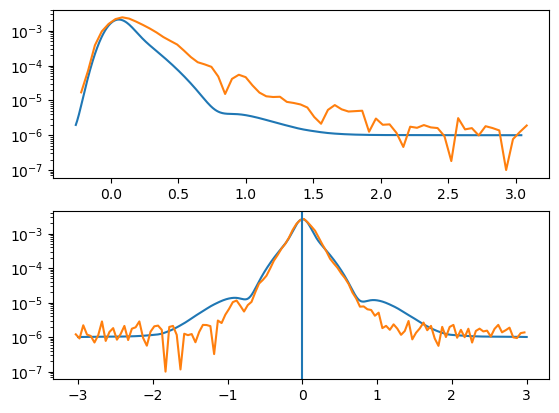

In [ ]:
#fit for 825
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM825135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM825135T12cut.csv'
outputfile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4ps'
T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])



ol21 = 0.006371028239456868#overlap of hh exciton state
ol61 = 0.00673715669279215 #overlap of lh exciton state
oli21 =0.0020621057829033323#overlap of hh bound exciton state
oli61 = 0.0015146049256973852#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.006/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.020/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 0.9e-112#
Ad = 4.8e-3
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61  ,gmi21  , # 8,9
      gmi61 ,K      , # 10,11    
      Ad     ] # 12  

t = T3refdata[:,0]*1e-12+4e-12
t = np.linspace(t[0],t[-1],1000)
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.355,t0),mode='same')


fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-3.96,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.08,T3refdata[:,1])



tau = T12data[:,0]*1e-12
tau = np.linspace(tau[0],tau[-1],1000)
t = 4.02e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0]-.03,T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()

[-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25
  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85
  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45
  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.    2.05
  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.45  2.5   2.55  2.6   2.65
  2.7   2.75  2.8   2.85  2.9   2.95  3.  ]
[0.00458339 0.        ]
[0.00458339 0.        ]


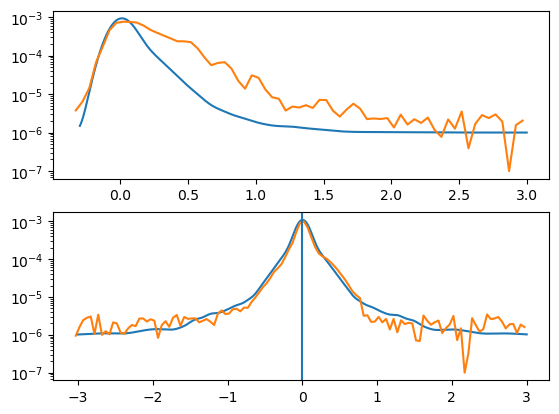

In [ ]:
#fit for 830
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM830135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM830135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])

ol21  = 0.004583393853695028#overlap of hh exciton state
ol61  = 0.005189441484312154#overlap of lh exciton state
oli21 = 0.0027638344560340926 #overlap of hh bound exciton state
oli61 = 0.0023313088705731472#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.006/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.020/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 0.8e-112#
Ad = 2.5e-3
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61  ,gmi21  , # 8,9
      gmi61 ,K      , # 10,11    
      Ad     ] # 12  


t = T3refdata[:,0]*1e-12+4e-12
t = np.linspace(t[0],t[-1],1000)
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.355,t0),mode='same')
#Pv = fitfunctt(t,*p0)

fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-4,Pv+1e-6)
axs[0].plot(T3refdata[:,0]-.03,T3refdata[:,1])



tau = T12data[:,0]*1e-12
tau = np.linspace(tau[0],tau[-1],1000)
t = 4.02e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.18e-12/2.355,tau0),mode='same')
#Pv = fitfunctt(t,*p0,tau=tau)
axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0]-.03,T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()

[-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25
  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85
  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45
  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.    2.05
  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.45  2.5   2.55  2.6   2.65
  2.7   2.75  2.8   2.85  2.9   2.95  3.  ]
[0.00286369 0.        ]
[0.00286369 0.        ]


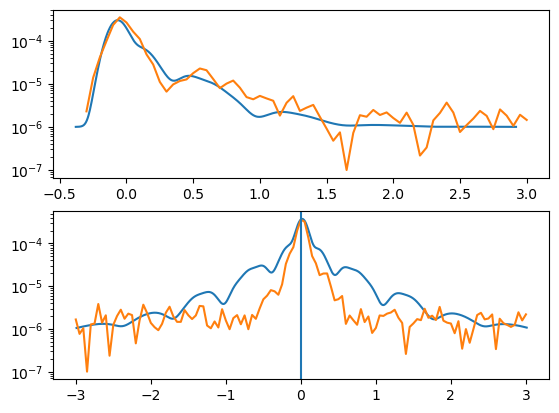

In [ ]:
#fit for 835
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'/HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM835135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM835135T12cut.csv'
outputfile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM835135Results.csv'
T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])

0.02400631166452838

ol21 = 0.0028636887662351427#overlap of hh exciton state
ol61 = 0.003353426568822032 #overlap of lh exciton state
oli21 = 0.0026959084611443925  #overlap of hh bound exciton state
oli61 = 0.002848167622866112#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.0060/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.020/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 2.0e-112#
Ad = .5e-3
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61  ,gmi21  , # 8,9
      gmi61 ,K      , # 10,11    
      Ad     ] # 12  


t = T3refdata[:,0]*1e-12+4e-12
t = np.linspace(t[0],t[-1],1000)
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.14e-12/2.355,t0),mode='same')
sf = np.vstack([t*1e12-4.05,Pv+2e-6])

fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-4.08,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.00,T3refdata[:,1])



tau = T12data[:,0]*1e-12
tau = np.linspace(tau[0],tau[-1],1000)
t = 4.02e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.14e-12/2.355,tau0),mode='same')
sf=np.vstack([sf,tau*1e12+.01])
sf=np.vstack([sf,Pv+2e-6])
axs[1].plot(tau*1e12+.01,Pv+1e-6)
axs[1].plot(T12data[0:,0],T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()
np.savetxt(directory+outputfile,sf.transpose(),delimiter=';')

[-0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25
  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85
  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45
  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.  ]
[0.00169096 0.        ]
[0.00169096 0.        ]


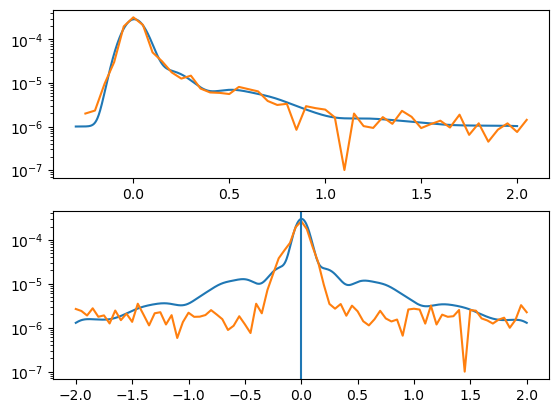

In [ ]:
#fit for 840
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
directory =maindir+'HFWMV2 CS NW InitialTest/840nm/Results/'
T3reffile = '3mW1mW3mWphotonechok1-0.3ps2psk3-2ps2psk2-4ps2T3refcut.csv'
T12file = '3mW1mW3mWphotonechok1-0.3ps2psk3-2ps2psk2-4ps2T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
print(T3refdata[:,0])

ol21 = 0.001690955596621561#overlap of hh exciton state
ol61 = 0.0020038702121639817#overlap of lh exciton state
oli21 = 0.0019215278144716352 #overlap of hh bound exciton state
oli61 =0.002482550790723118 #overlap of lh bound exciton state

#Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
#Ex2 =  c.e*0.007/c.hbar#Acceptor bound exciton splitting energy 
#EB  = -c.e*0.02/c.hbar #Acceptor bound exciton binding energy  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 1.8e-112#
Ad = .6e-3
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61  ,gmi21  , # 8,9
      gmi61 ,K      , # 10,11    
      Ad     ] # 12  


t = T3refdata[:,0]*1e-12+4e-12
t = np.linspace(t[0],t[-1],1000)
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.12e-12/2.355,t0),mode='same')


fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-4,Pv+1e-6)
axs[0].plot(T3refdata[:,0]+.05,T3refdata[:,1])



tau = T12data[:,0]*1e-12
tau = np.linspace(tau[0],tau[-1],1000)
t = 4.02e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fftconvolve(fitfunctt(t,*p0,tau=tau),dtau*gauss(tau,.12e-12/2.355,tau0),mode='same')

axs[1].plot(tau*1e12,Pv+1e-6)
axs[1].plot(T12data[0:,0],T12data[0:,1])
axs[1].axvline(0)
tau = 0e-12
plt.show()